In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [144]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
df=pd.read_csv(r"D:\Feature engineering\heart.csv")

In [146]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [147]:
df['target'].unique()

array([0, 1], dtype=int64)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [149]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

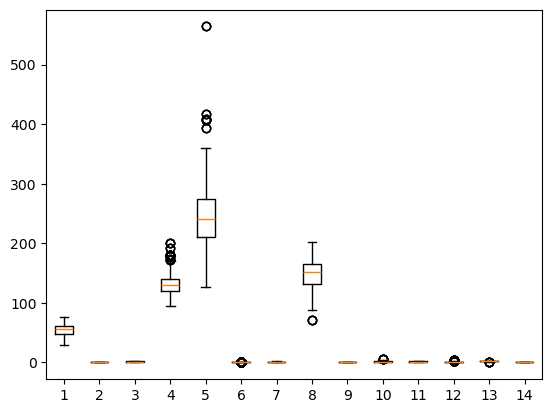

In [150]:
plt.boxplot(df)
plt.show()

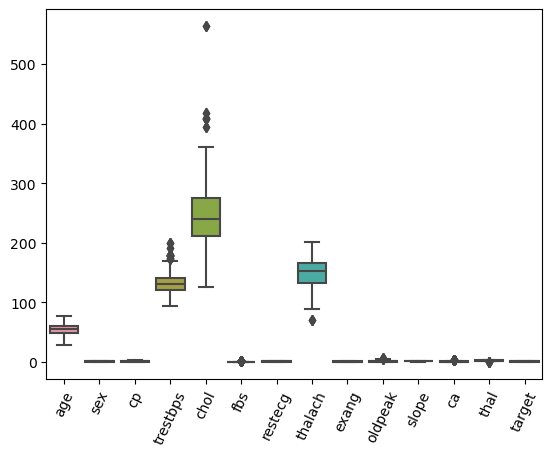

In [151]:
sns.boxplot(df)
plt.xticks(rotation=65)
plt.show()

In [152]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [153]:
col=['trestbps', 'chol', 'fbs','thalach','oldpeak','ca', 'thal']

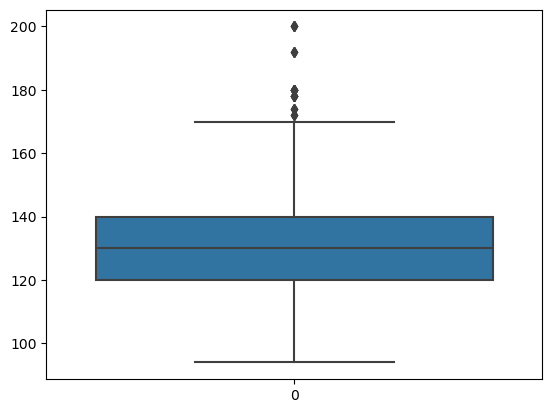

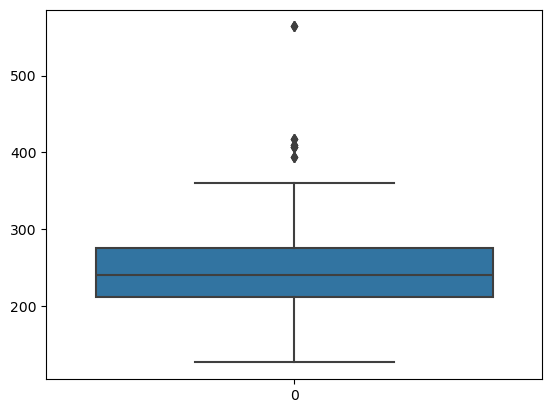

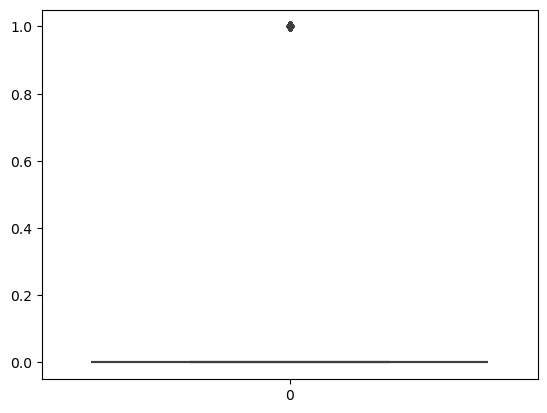

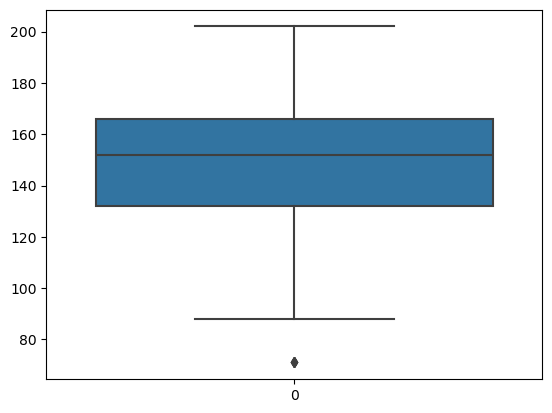

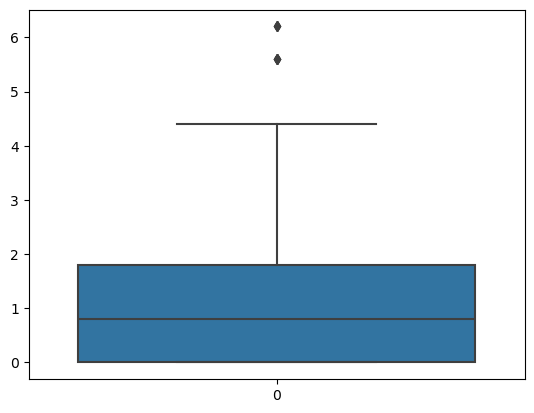

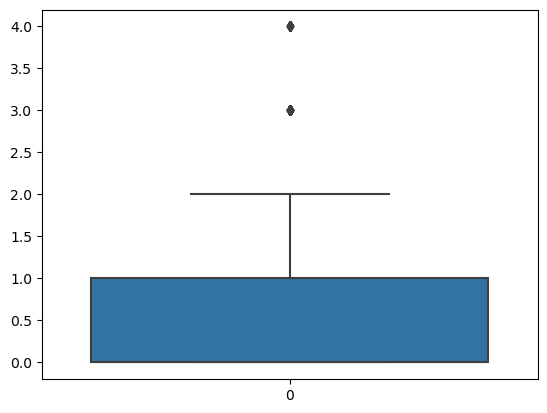

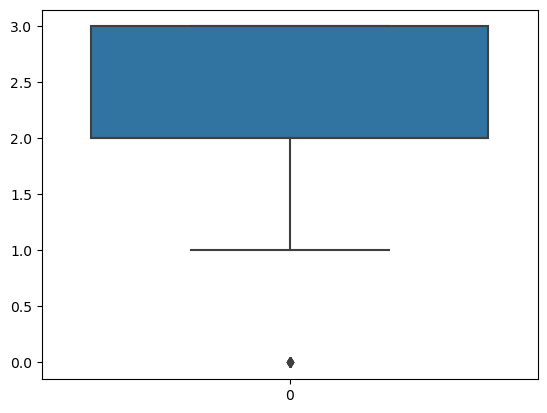

In [154]:
for i in col:
    sns.boxplot(df[i])
    plt.show()

In [155]:
for i in col:
    sk=df[i].skew().round()
    print(sk)
    

1.0
1.0
2.0
-1.0
1.0
1.0
-1.0


In [156]:
for i in col:
    sk=df[i].skew().round()
    if sk==0 or sk==-0:
        m=df[i].mean()
        s=df[i].std()
        ll=m-3*s
        ul=m+3*s
        df[i]=df[i].map(lambda x : ll if x<ll else ul if x>ul else x)
    else:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        ll=q1-1.5*iqr
        ul=q3+1.5*iqr
        df[i]=df[i].map(lambda x : ll if x<ll else ul if x>ul else x )
print("done with errors")
df

done with errors


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0.0,1,168.0,0,1.0,2,2.0,3.0,0
1,53,1,0,140.0,203.0,0.0,0,155.0,1,3.1,0,0.0,3.0,0
2,70,1,0,145.0,174.0,0.0,1,125.0,1,2.6,0,0.0,3.0,0
3,61,1,0,148.0,203.0,0.0,1,161.0,0,0.0,2,1.0,3.0,0
4,62,0,0,138.0,294.0,0.0,1,106.0,0,1.9,1,2.5,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140.0,221.0,0.0,1,164.0,1,0.0,2,0.0,2.0,1
1021,60,1,0,125.0,258.0,0.0,0,141.0,1,2.8,1,1.0,3.0,0
1022,47,1,0,110.0,275.0,0.0,0,118.0,1,1.0,1,1.0,2.0,0
1023,50,0,0,110.0,254.0,0.0,0,159.0,0,0.0,2,0.0,2.0,1


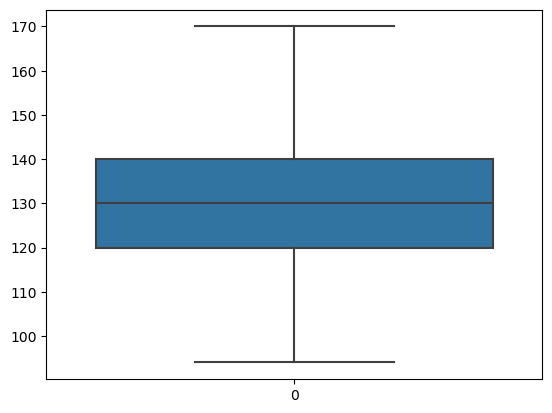

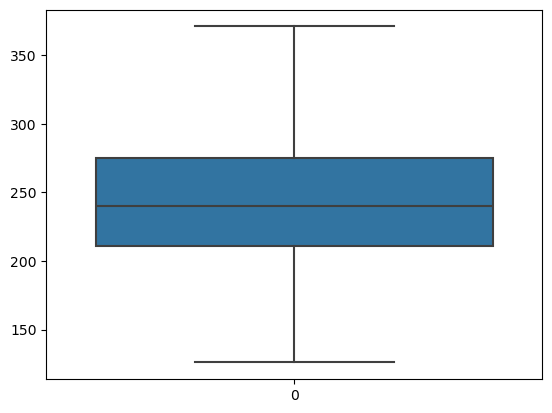

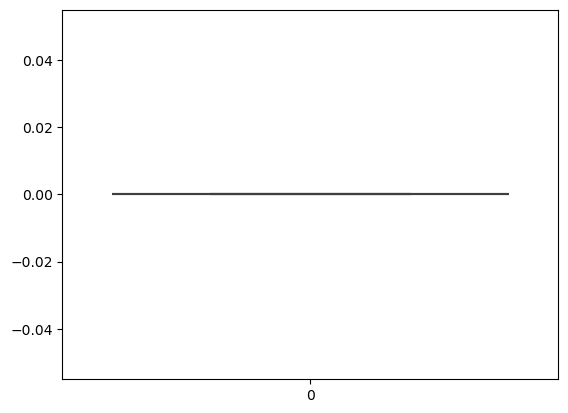

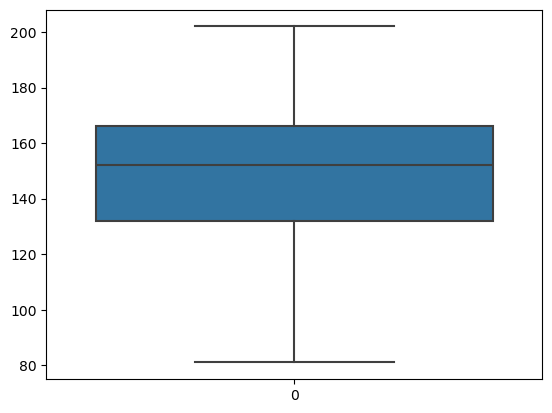

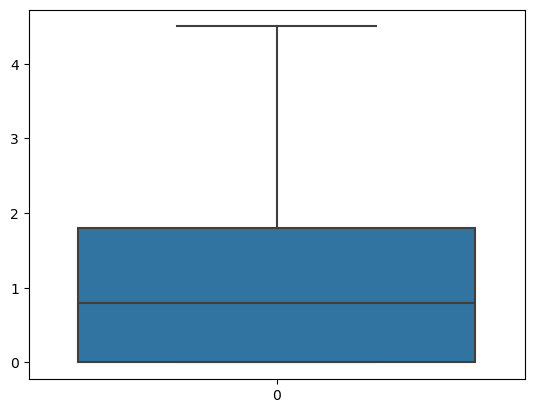

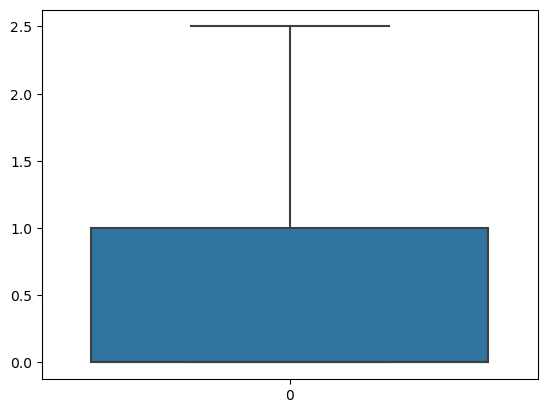

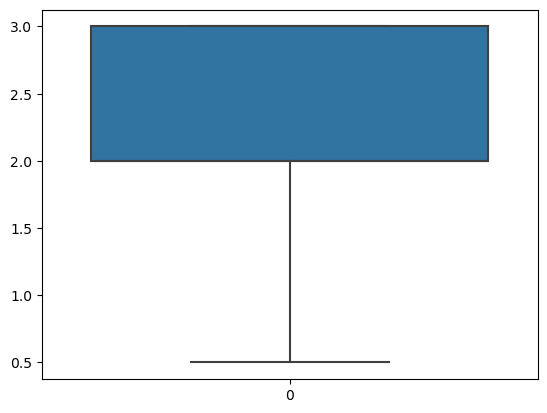

In [157]:
for i in col:
    sns.boxplot(df[i])
    plt.show()

In [158]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0.0,1,168.0,0,1.0,2,2.0,3.0,0
1,53,1,0,140.0,203.0,0.0,0,155.0,1,3.1,0,0.0,3.0,0
2,70,1,0,145.0,174.0,0.0,1,125.0,1,2.6,0,0.0,3.0,0
3,61,1,0,148.0,203.0,0.0,1,161.0,0,0.0,2,1.0,3.0,0
4,62,0,0,138.0,294.0,0.0,1,106.0,0,1.9,1,2.5,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140.0,221.0,0.0,1,164.0,1,0.0,2,0.0,2.0,1
1021,60,1,0,125.0,258.0,0.0,0,141.0,1,2.8,1,1.0,3.0,0
1022,47,1,0,110.0,275.0,0.0,0,118.0,1,1.0,1,1.0,2.0,0
1023,50,0,0,110.0,254.0,0.0,0,159.0,0,0.0,2,0.0,2.0,1


In [159]:
X =df.drop('target',axis=1)

In [160]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125.0,212.0,0.0,1,168.0,0,1.0,2,2.0,3.0
1,53,1,0,140.0,203.0,0.0,0,155.0,1,3.1,0,0.0,3.0
2,70,1,0,145.0,174.0,0.0,1,125.0,1,2.6,0,0.0,3.0
3,61,1,0,148.0,203.0,0.0,1,161.0,0,0.0,2,1.0,3.0
4,62,0,0,138.0,294.0,0.0,1,106.0,0,1.9,1,2.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140.0,221.0,0.0,1,164.0,1,0.0,2,0.0,2.0
1021,60,1,0,125.0,258.0,0.0,0,141.0,1,2.8,1,1.0,3.0
1022,47,1,0,110.0,275.0,0.0,0,118.0,1,1.0,1,1.0,2.0
1023,50,0,0,110.0,254.0,0.0,0,159.0,0,0.0,2,0.0,2.0


In [161]:
y=df['target']

In [162]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [163]:
y.value_counts()

target
1    526
0    499
Name: count, dtype: int64

<Axes: xlabel='target'>

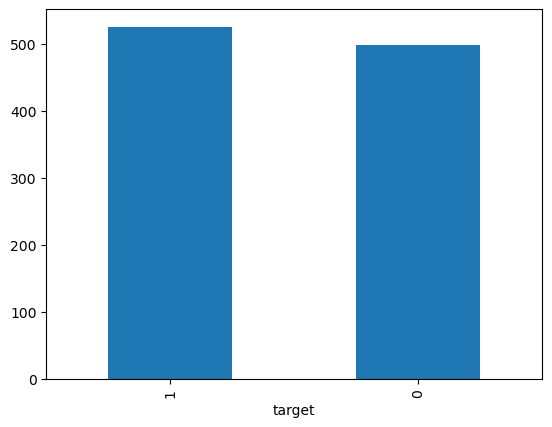

In [164]:
y.value_counts().plot(kind='bar')

In [165]:
train_test_split(X,y,test_size=0.20)

[     age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
 577   70    1   0     130.0  322.0  0.0        0    109.0      0      2.4   
 549   68    1   2     118.0  277.0  0.0        1    151.0      0      1.0   
 159   41    1   1     120.0  157.0  0.0        1    182.0      0      0.0   
 448   51    0   2     120.0  295.0  0.0        0    157.0      0      0.6   
 256   35    0   0     138.0  183.0  0.0        1    182.0      0      1.4   
 ..   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
 660   61    1   0     138.0  166.0  0.0        0    125.0      1      3.6   
 376   59    1   1     140.0  221.0  0.0        1    164.0      1      0.0   
 434   41    0   2     112.0  268.0  0.0        0    172.0      1      0.0   
 22    45    1   0     104.0  208.0  0.0        0    148.0      1      3.0   
 466   44    1   1     130.0  219.0  0.0        0    188.0      0      0.0   
 
      slope   ca  thal  
 577      1  2.5   2.0  
 549      2 

In [166]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=2)

In [167]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((820, 13), (205, 13), (820,), (205,))

In [168]:
dtm=DecisionTreeClassifier()

In [169]:
dtm

DecisionTreeClassifier()

In [170]:
dtm.fit(X_train,y_train)

DecisionTreeClassifier()

In [171]:
dtm.score(X_test,y_test)

0.9804878048780488

## going with logistic regression

In [172]:
from sklearn.linear_model import LogisticRegression


In [173]:
logrex=LogisticRegression()

In [174]:
logrex

LogisticRegression()

In [175]:
logrex.fit(X_train,y_train)

LogisticRegression()

In [176]:
logrex.score(X_test,y_test)

0.8682926829268293

In [177]:
## ranom forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [178]:
rfc

RandomForestClassifier()

In [179]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [180]:
rfc.score(X_test,y_test)

1.0

## auto


Decision Tree

Logistic Regression

SVM

Random Forest Classifier

KNN

Ada Boost

Gradient Boost

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [182]:
import warnings
warnings.filterwarnings('ignore')

In [183]:
dt=DecisionTreeClassifier()
lr= LogisticRegression()
sv= SVC()
rfc=RandomForestClassifier()
ada=AdaBoostClassifier()
gbc= GradientBoostingClassifier()
knn= KNeighborsClassifier()

In [184]:
model= [ dt,lr,sv,rfc,ada,gbc,knn]

In [185]:
model

[DecisionTreeClassifier(),
 LogisticRegression(),
 SVC(),
 RandomForestClassifier(),
 AdaBoostClassifier(),
 GradientBoostingClassifier(),
 KNeighborsClassifier()]

In [186]:
d=[]
for m in model:
    m.fit(X_train,y_train)
    s=m.score(X_test,y_test)
    print(m,"==",s)
    d.append(s)
print(d)

DecisionTreeClassifier() == 0.9804878048780488
LogisticRegression() == 0.8682926829268293
SVC() == 0.7317073170731707
RandomForestClassifier() == 1.0
AdaBoostClassifier() == 0.9121951219512195
GradientBoostingClassifier() == 0.9658536585365853
KNeighborsClassifier() == 0.7024390243902439
[0.9804878048780488, 0.8682926829268293, 0.7317073170731707, 1.0, 0.9121951219512195, 0.9658536585365853, 0.7024390243902439]


In [187]:
max(d)
q=d.index(max(d))
model[q]
print("max  score getting by ",model[q],"==",max(d))

max  score getting by  RandomForestClassifier() == 1.0


##  Diabaties dataset

In [188]:
dfd=pd.read_csv(r"D:\Feature engineering\Data Set set\Logistic Regression\diabetes.csv")
dfd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [189]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [190]:
dfd['BMI'].dtype

dtype('float64')

##  auto error detection and fill na values by creacting by by self 

In [191]:
c=dfd.columns
NaN_col=[]
col=[]
for x in c:
    if dfd[x].isna().sum() != 0:
        NaN_col.append(x)
        if dfd[x].dtype=='int64' or dfd[x].dtype=='objet':
            dfd[x].fillna(dfd[x].mode(),inplace=True)
        else:
            dfd[x].fillna(dfd[x].mean().round(),inplace=True)
    else:
        col.append(x)
print("columns with nan  vlues ==  ",NaN_col)
print("columns without the nan values == ",col) 

display(dfd)
print("rechecking of nan in after filling the nan " ,dfd.isna().sum())

columns with nan  vlues ==   []
columns without the nan values ==  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


rechecking of nan in after filling the nan  Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [192]:
NaN_col=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
col

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

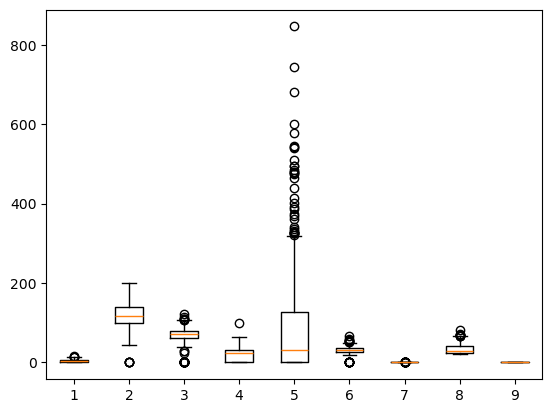

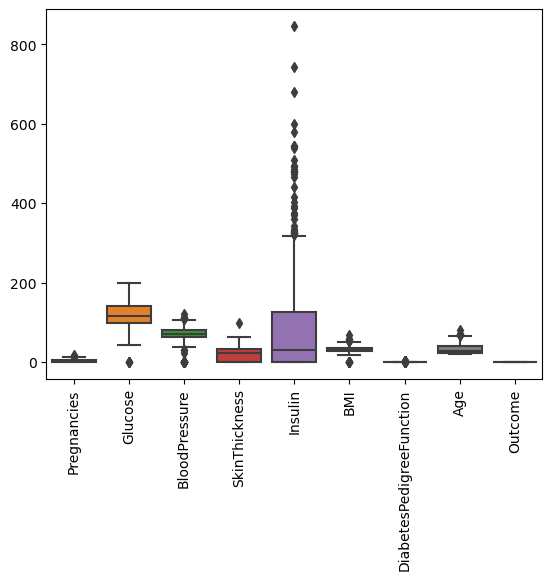

Pregnancies
0


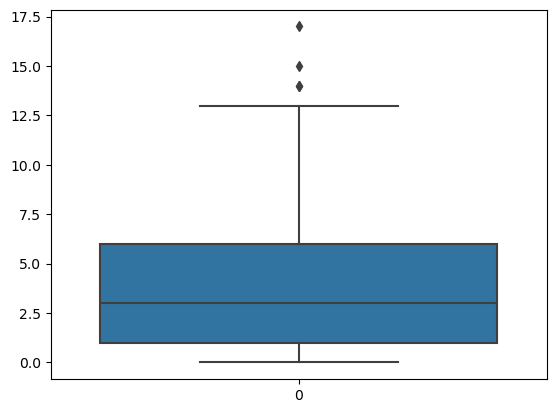

Glucose
0


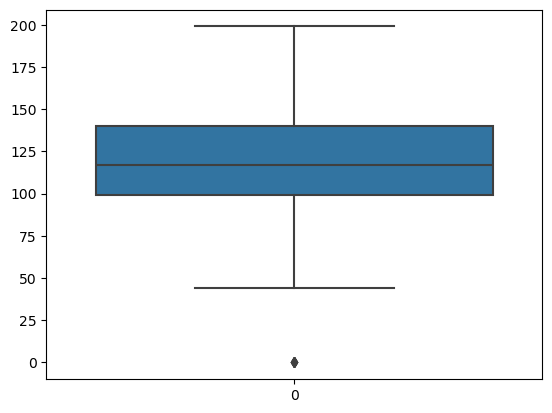

BloodPressure
0


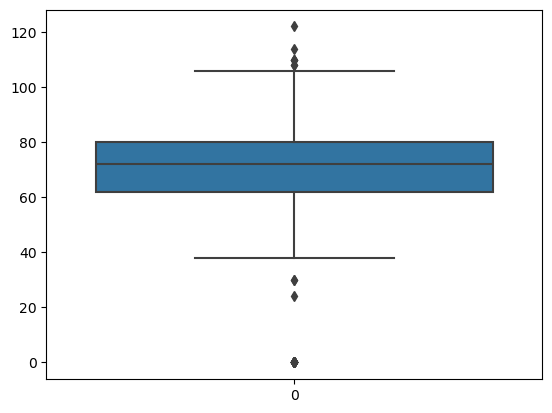

SkinThickness
0


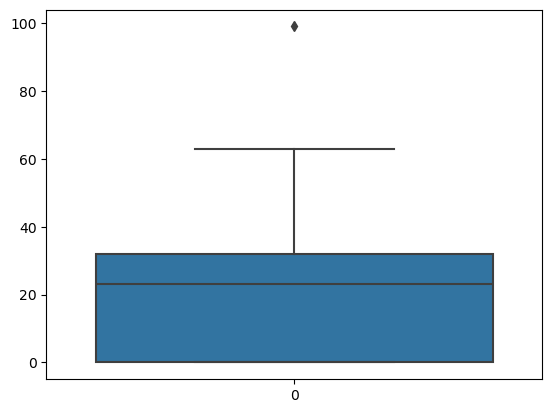

Insulin
0


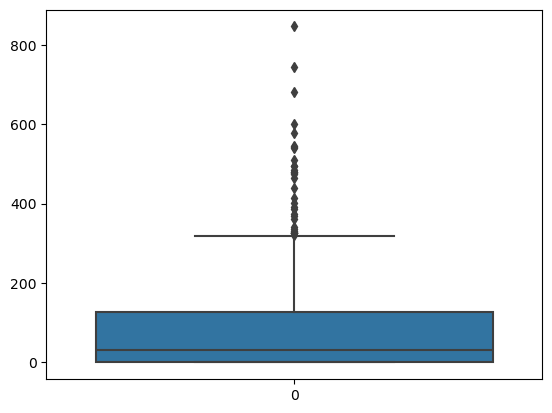

BMI
0


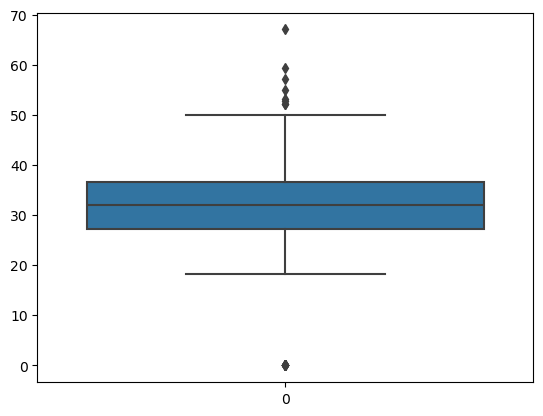

DiabetesPedigreeFunction
0


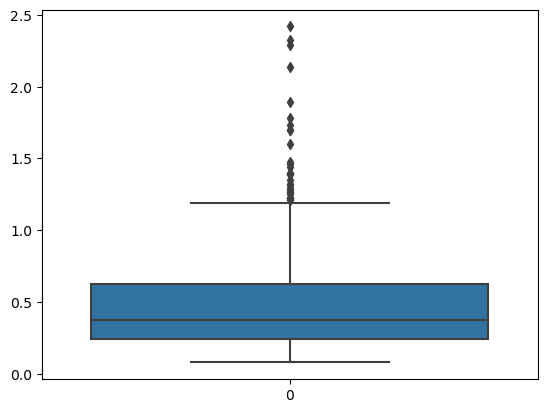

Age
0


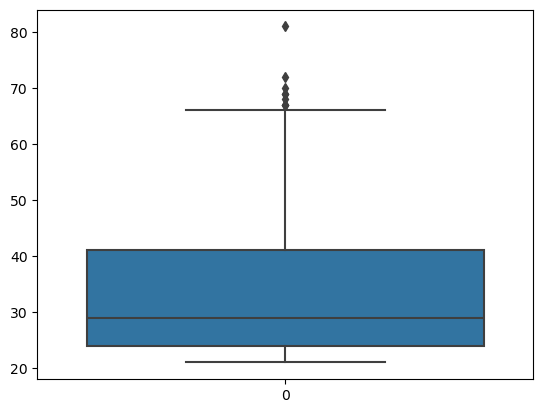

Outcome
0


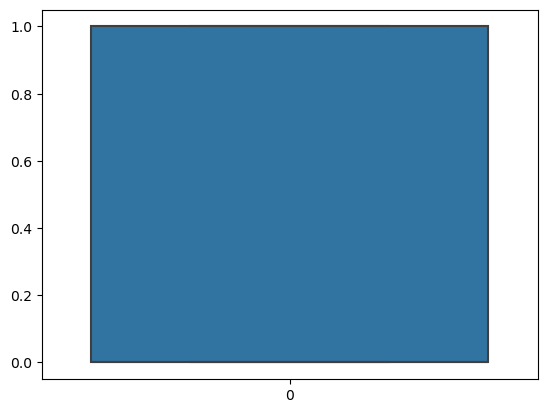

In [204]:
plt.boxplot(dfd)
plt.show()
sns.boxplot(dfd)
plt.xticks(rotation=90)
plt.show()
for i in col:
    print(i)
    print(dfd[i].isna().sum())
    plt.boxplot(dfd[i])
    sns.boxplot(dfd[i])
    plt.show()



for i in col:
    sk=dfd[i].skew().round()
    if sk==0 or sk==-0:
        m=dfd[i].mean()
        s=dfd[i].std()
        ll=m-3*s
        ul=m+3*s
        dfd[i]=dfd[i].map(lambda x : ll if x<ll else ul if x>ul else x)
    else:
        q1=dfd[i].quantile(0.25)
        q3=dfd[i].quantile(0.75)
        iqr=q3-q1
        ll=q1=3*iqr
        ul=q3-3*iqr
        dfd[i]=dfd[i].map(lambda x : ll if x<ll else ul if x>ul else x)
print("After removing the errors")
dfd

In [194]:
dfd['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [195]:
dfd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [196]:
x=dfd.drop('Outcome',axis=1)
y=dfd['Outcome']
display(x,y)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [197]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)

Axes(0.125,0.11;0.775x0.77)


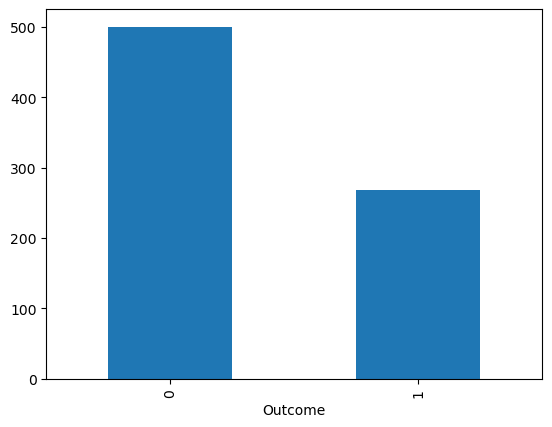

In [198]:
print(y.value_counts().plot(kind="bar"))


In [199]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


dt=     DecisionTreeClassifier()
lr=         LogisticRegression()
sv=                        SVC()
rfc=    RandomForestClassifier()
ada=        AdaBoostClassifier()
gbc=GradientBoostingClassifier()
knn=      KNeighborsClassifier()


model= [ dt,lr,sv,rfc,ada,gbc,knn]


for x in model:
    x.fit(xtrain,ytrain)
    x.score(xtest,ytest)
    print(x,"  ==  ",x.score(xtest,ytest))

DecisionTreeClassifier()   ==   0.7402597402597403
LogisticRegression()   ==   0.8116883116883117
SVC()   ==   0.8246753246753247
RandomForestClassifier()   ==   0.8246753246753247
AdaBoostClassifier()   ==   0.7727272727272727
GradientBoostingClassifier()   ==   0.8311688311688312
KNeighborsClassifier()   ==   0.7402597402597403


In [200]:
s=[]

for x in model:
    x.fit(xtrain,ytrain)
    x.score(xtest,ytest)
    p=x.score(xtest,ytest)
    s.append(p)
print(s)


[0.7467532467532467, 0.8116883116883117, 0.8246753246753247, 0.8051948051948052, 0.7727272727272727, 0.8311688311688312, 0.7402597402597403]


In [201]:
print(s)
m=max(s)
print("maximum score == ",m)
print("index  number of max score ==",s.index(m))

[0.7467532467532467, 0.8116883116883117, 0.8246753246753247, 0.8051948051948052, 0.7727272727272727, 0.8311688311688312, 0.7402597402597403]
maximum score ==  0.8311688311688312
index  number of max score == 5


In [202]:
print(model[(s.index(m))],"==", m)

GradientBoostingClassifier() == 0.8311688311688312
